In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
# import geopandas as gpd
plt.style.use("ggplot")  #using style ggplot
from sklearn.model_selection import train_test_split
pd.set_option('display.max_rows', 1000)
from datetime import date
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import scipy.stats as stats

In [2]:
df = pd.read_csv('/home/abhishek/Documents/tesla/TSLA_5_Year.csv')

In [3]:
df.sample(10)

,Date,Open,High,Low,Close,Adj Close,Volume
219,2017-11-14,63.000000,63.270000,61.380001,61.740002,61.740002,28380500
1039,2021-02-19,795.000000,796.789978,777.369995,781.299988,781.299988,18958300
1190,2021-09-24,745.890015,774.799988,744.559998,774.390015,774.390015,21373000
906,2020-08-10,289.600006,291.500000,277.167999,283.713989,283.713989,37611500
1136,2021-07-09,653.179993,658.909973,644.690002,656.950012,656.950012,18140500
643,2019-07-25,46.700001,46.900002,45.110001,45.764000,45.764000,112091500
105,2017-06-05,67.699997,69.688004,66.842003,69.463997,69.463997,33922000
1179,2021-09-09,753.409973,762.099976,751.630005,754.859985,754.859985,14077700
1260,2022-01-04,1189.550049,1208.000000,1123.050049,1149.589966,1149.589966,33416100
961,2020-10-27,423.760010,430.500000,420.100006,424.679993,424.679993,22686500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1342 entries, 0 to 1341
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1342 non-null   object 
 1   Open       1342 non-null   float64
 2   High       1342 non-null   float64
 3   Low        1342 non-null   float64
 4   Close      1342 non-null   float64
 5   Adj Close  1342 non-null   float64
 6   Volume     1342 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 73.5+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1.342000e+03
mean,293.747042,300.376309,286.584130,293.741256,293.741256,4.356359e+07
std,335.777594,343.486244,327.156431,335.482524,335.482524,2.961138e+07
min,36.220001,37.335999,35.397999,35.793999,35.793999,9.800600e+06
25%,60.400002,61.492501,59.260998,60.509000,60.509000,2.458988e+07
50%,70.789002,71.868000,69.821999,70.665001,70.665001,3.430435e+07
75%,602.200012,616.739990,592.877502,604.824997,604.824997,5.072438e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


In [6]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
df2 = df

In [8]:
#Conversion data type column -  date from object to Datetime

df2["Date"]=pd.to_datetime(df2["Date"])

In [9]:
# check unique value
df2.nunique().sort_values()

High         1290
Open         1294
Low          1305
Close        1323
Adj Close    1323
Volume       1337
Date         1342
dtype: int64

In [10]:
# check duplicated  value
df2.duplicated().sum()

0

In [11]:
# make 2 column - Year & Month 

df2["Year"]=df["Date"].dt.year
df2["Month"]=df["Date"].dt.month

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1342 entries, 0 to 1341
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1342 non-null   datetime64[ns]
 1   Open       1342 non-null   float64       
 2   High       1342 non-null   float64       
 3   Low        1342 non-null   float64       
 4   Close      1342 non-null   float64       
 5   Adj Close  1342 non-null   float64       
 6   Volume     1342 non-null   int64         
 7   Year       1342 non-null   int64         
 8   Month      1342 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(3)
memory usage: 94.5 KB


In [13]:
df2.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month
0,2017-01-03,42.972000,44.066002,42.192001,43.397999,43.397999,29616500,2017,1
1,2017-01-04,42.950001,45.599998,42.862000,45.397999,45.397999,56067500,2017,1
2,2017-01-05,45.284000,45.495998,44.389999,45.349998,45.349998,29558500,2017,1
3,2017-01-06,45.386002,46.062000,45.090000,45.801998,45.801998,27639500,2017,1
4,2017-01-09,45.793999,46.383999,45.599998,46.256001,46.256001,19897500,2017,1
5,2017-01-10,46.400002,46.400002,45.377998,45.973999,45.973999,18300000,2017,1
6,2017-01-11,45.813999,45.995998,45.335999,45.945999,45.945999,18254000,2017,1
7,2017-01-12,45.812000,46.139999,45.116001,45.917999,45.917999,18951000,2017,1
8,2017-01-13,46.000000,47.570000,45.917999,47.549999,47.549999,30465000,2017,1
9,2017-01-17,47.340000,47.992001,46.874001,47.116001,47.116001,23087500,2017,1


# Some Ploting

<AxesSubplot:xlabel='Date', ylabel='High'>

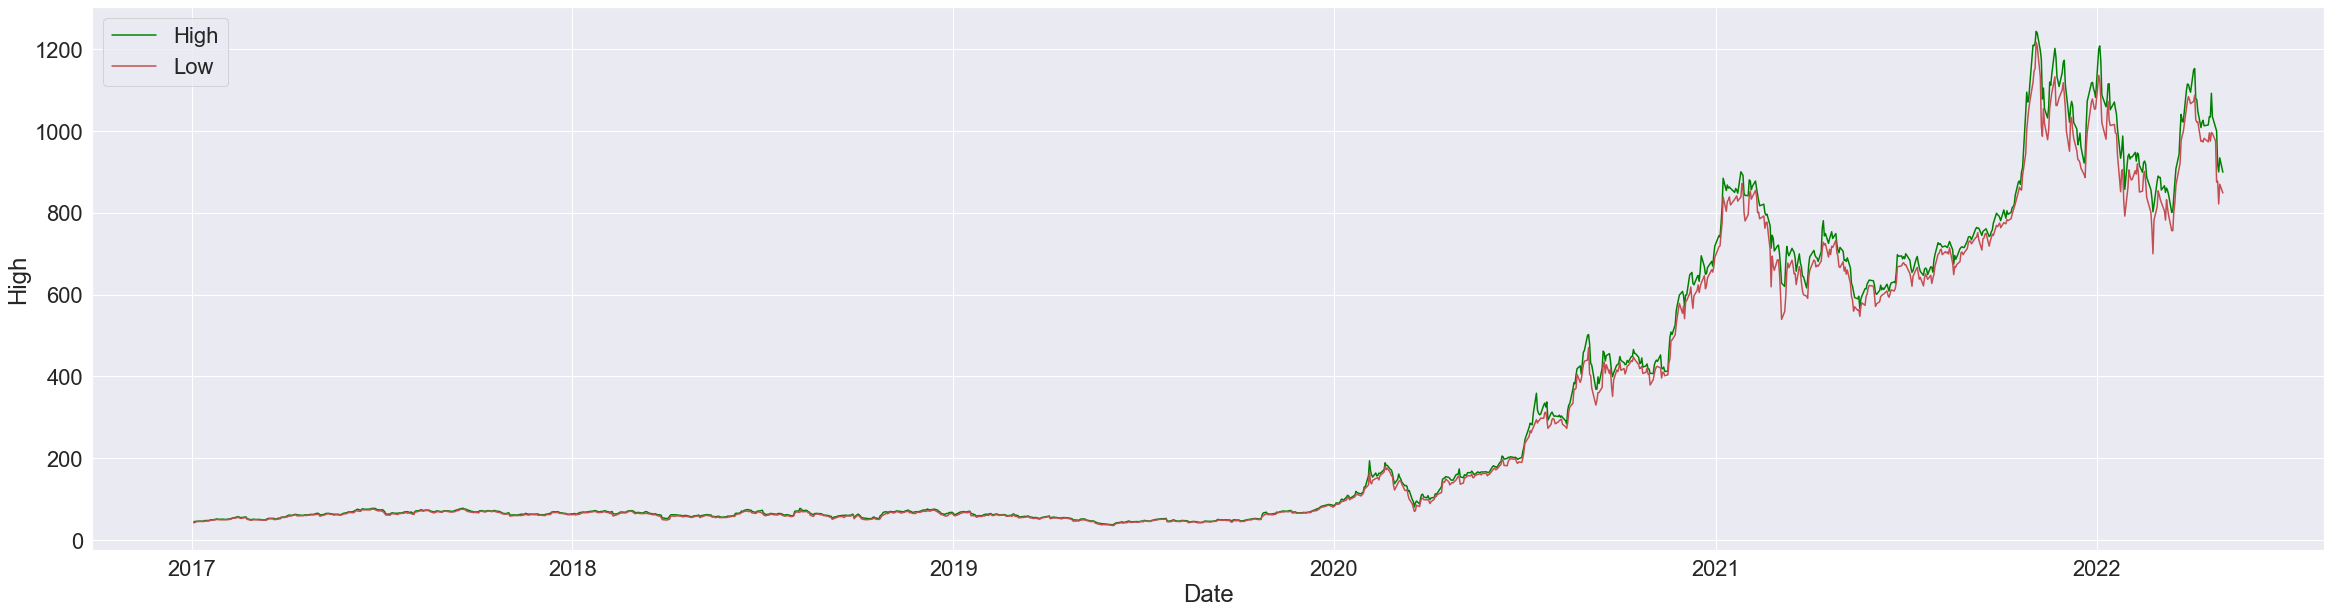

In [14]:

plt.figure(figsize=(40,10))
sns.set(font_scale = 2)

sns.lineplot(x='Date', y='High', data=df2,color = 'green',label = 'High')
sns.lineplot(x='Date', y='Low', data=df2,color = 'r',label = 'Low')


<AxesSubplot:xlabel='Date', ylabel='Open'>

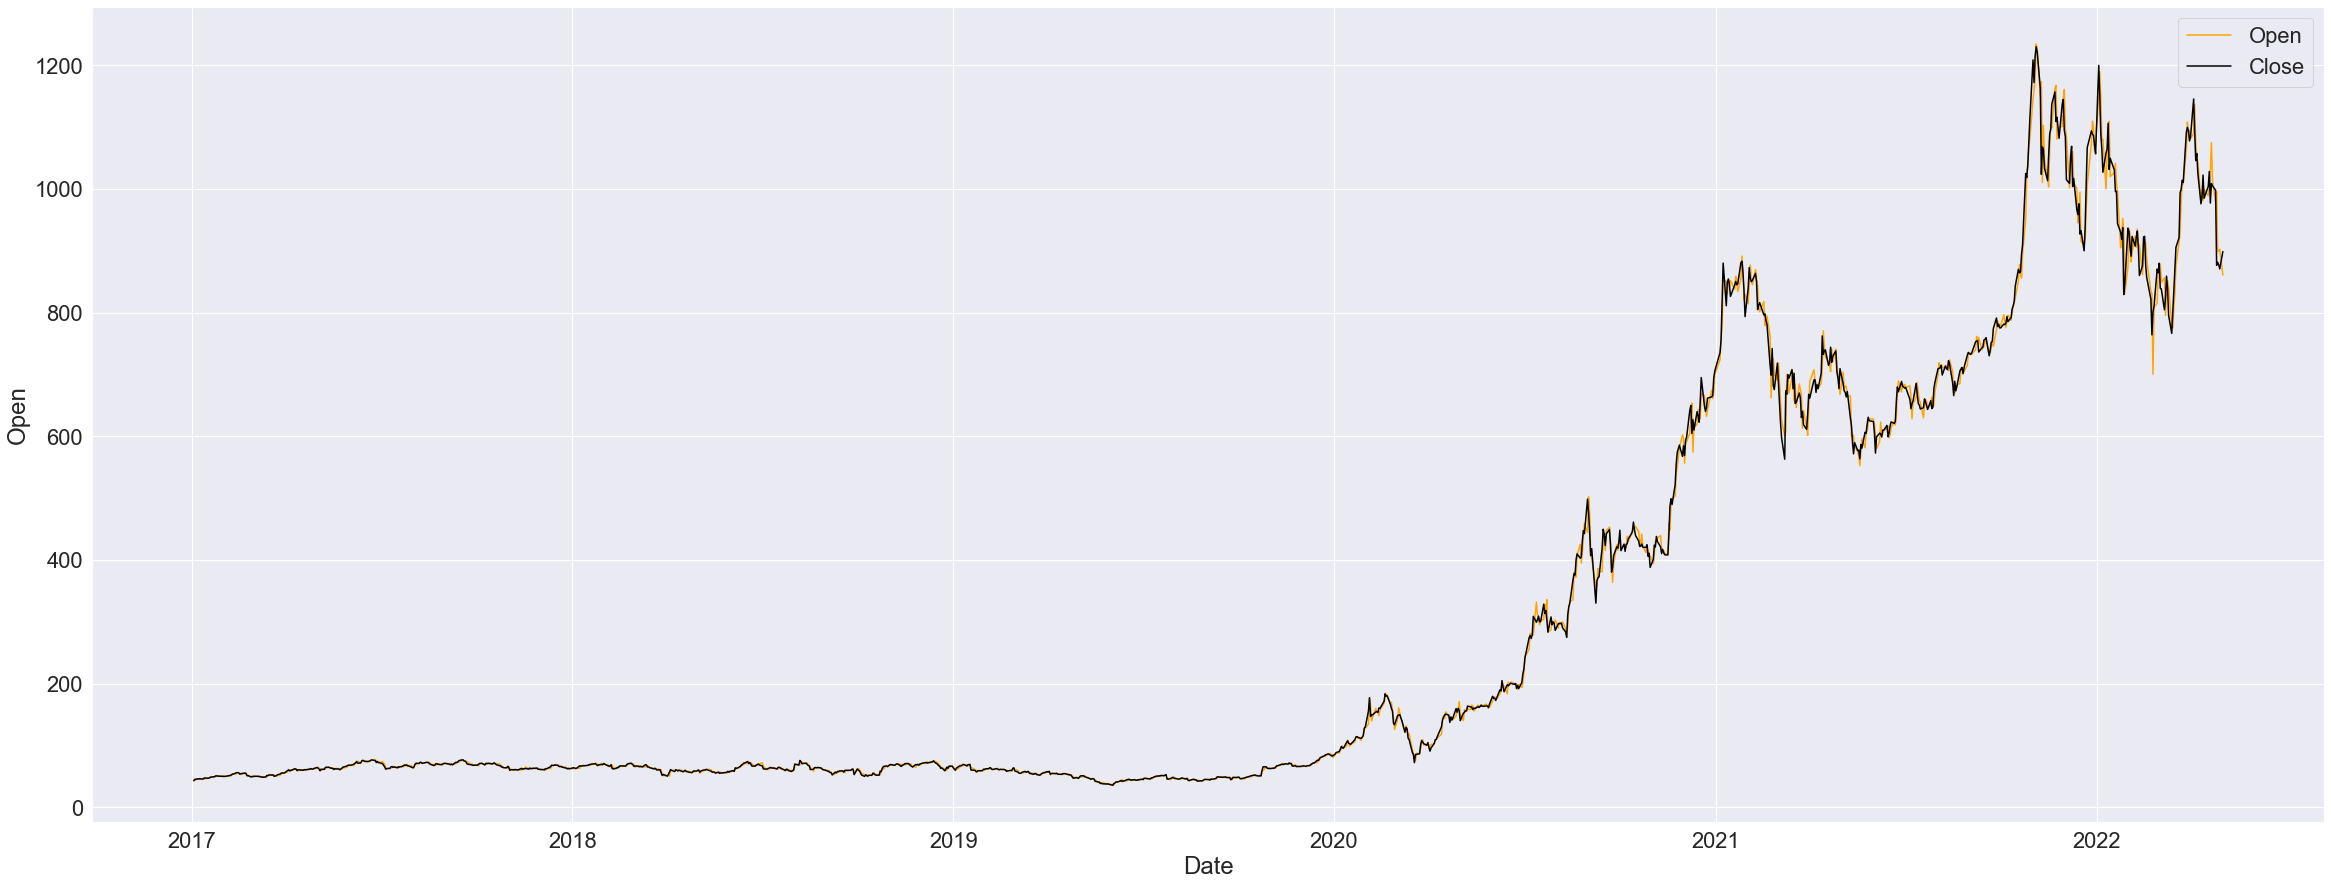

In [15]:
plt.figure(figsize=(40,15))
sns.set(font_scale = 2)

sns.lineplot(x='Date', y='Open', data=df2,color = 'orange',label = 'Open')
sns.lineplot(x='Date', y='Close', data=df2,color = 'black',label = 'Close')

In [16]:
a=df.groupby("Year")['High','Low','Open','Close'].mean().round(2)


<AxesSubplot:xlabel='Year'>

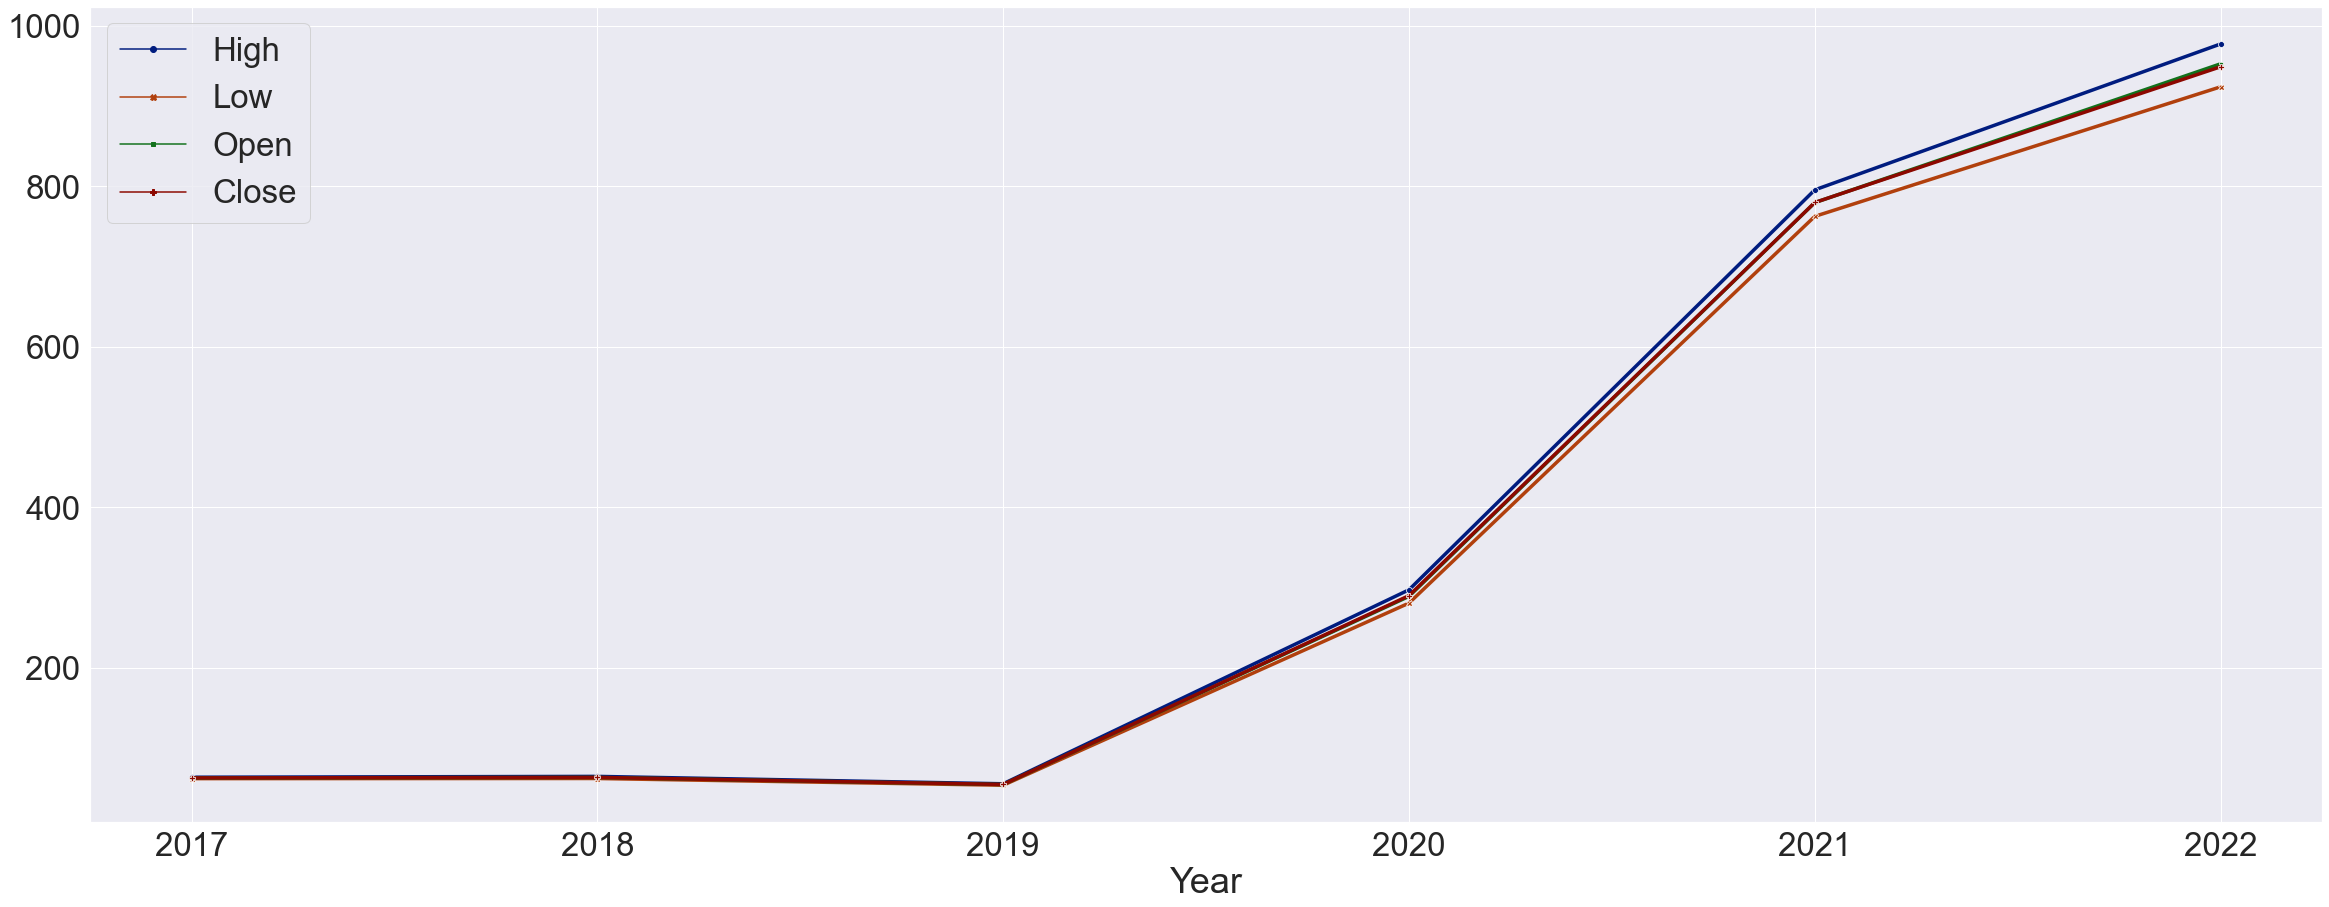

In [17]:
plt.figure(figsize=(40,15))
sns.set(font_scale = 3)
sns.lineplot(data=a,palette = "dark",sizes=(.25, 2.5),markers=True, dashes=False,legend="brief",linewidth = 3.5)

Dropping unnecessary feature
Dropping those feture whiche are not impotent for our Regession Model

In [18]:
df2=df2.drop(["Date"],axis=1)


In [19]:
df2.drop("Adj Close", axis=1, inplace=True)
df2

,Open,High,Low,Close,Volume,Year,Month
0,42.972000,44.066002,42.192001,43.397999,29616500,2017,1
1,42.950001,45.599998,42.862000,45.397999,56067500,2017,1
2,45.284000,45.495998,44.389999,45.349998,29558500,2017,1
3,45.386002,46.062000,45.090000,45.801998,27639500,2017,1
4,45.793999,46.383999,45.599998,46.256001,19897500,2017,1
...,...,...,...,...,...,...,...
1337,995.429993,1000.000000,875.000000,876.419983,45377900,2022,4
1338,898.580017,918.000000,877.359985,881.510010,25652100,2022,4
1339,899.979980,900.000000,821.700012,877.510010,41649500,2022,4
1340,902.250000,934.400024,870.000000,870.760010,29313400,2022,4


## Train Test Split

In [20]:
x=df2.iloc[:,0:].drop(['Volume'], axis = 1)
y=df2.iloc[:,4:5]

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

### Feature engineering

Feature scaling and Transformation 

Quantile Transformation on 'Open' (x_train) Column

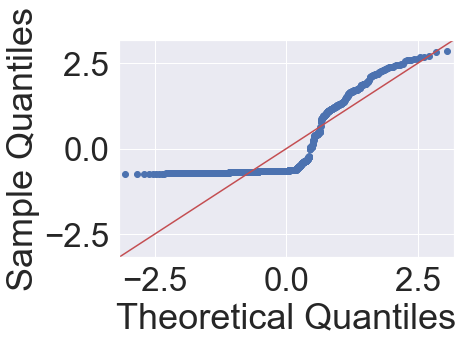

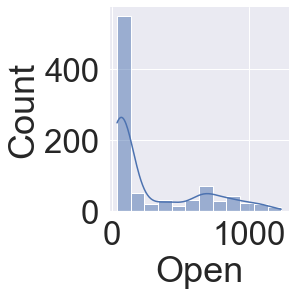

In [22]:
data=x_train.Open
sm.qqplot(data,line='45',fit=True,dist=stats.norm)
plt.show()
sns.displot(data, kde=True)

plt.show()

In [23]:
# k=np.array(x_train.Open)
# from sklearn.preprocessing import QuantileTransformer
# quantile = QuantileTransformer(output_distribution='normal')
# data_trans = quantile.fit_transform(k.reshape(-1, 1))
# x_train.Open = data_trans


In [24]:
# data=np.array(x_train.Open)
# sm.qqplot(data,line='45',fit=True,dist=stats.norm)
# plt.show()
# sns.displot(data, kde=True)
# plt.show()

Quantile Transformation on 'High' (x_train) Column

In [25]:
# data=x_train.High
# sm.qqplot(data,line='45',fit=True,dist=stats.norm)
# plt.show()
# sns.displot(data, kde=True)

# plt.show()

In [26]:
# k=np.array(x_train.High)
# from sklearn.preprocessing import QuantileTransformer
# quantile = QuantileTransformer(output_distribution='normal')
# data_trans = quantile.fit_transform(k.reshape(-1, 1))
# x_train.High = data_trans

In [27]:
# data=data_trans
# sm.qqplot(data,line='45',fit=True,dist=stats.norm)
# plt.show()
# sns.displot(data, kde=True)
# plt.show()

Quantile Transformation on 'Low' (x_train) Coloumn

In [28]:
# data=x_train.Low
# sm.qqplot(data,line='45',fit=True,dist=stats.norm)
# plt.show()
# sns.displot(data, kde=True)

# plt.show()

In [29]:
# k=np.array(x_train.Low)
# from sklearn.preprocessing import QuantileTransformer
# quantile = QuantileTransformer(output_distribution='normal')
# data_trans = quantile.fit_transform(k.reshape(-1, 1))
# x_train.Low = data_trans

In [30]:
# data=x_train.Low
# sm.qqplot(data,line='45',fit=True,dist=stats.norm)
# plt.show()
# sns.displot(data, kde=True)
# plt.show()

Quantile Transformation on 'Close' (x_train)Coloumn

In [31]:
# data=x_train.Close
# sm.qqplot(data,line='45',fit=True,dist=stats.norm)
# plt.show()
# sns.displot(data, kde=True)

# plt.show()

In [32]:
# k=np.array(x_train.Close)
# from sklearn.preprocessing import QuantileTransformer
# quantile = QuantileTransformer(output_distribution='normal')
# data_trans = quantile.fit_transform(k.reshape(-1, 1))
# x_train.Close = data_trans

In [33]:
# data=data_trans
# sm.qqplot(data,line='45',fit=True,dist=stats.norm)
# plt.show()
# sns.displot(data, kde=True)
# plt.show()

BoxCox Transformation on 'Volume'(y_train) Coloumn

In [34]:
# data=y_train
# sm.qqplot(data,line='45',fit=True,dist=stats.norm)
# plt.show()
# sns.displot(data, kde=True)
# plt.show()

In [35]:
# k,parameters1=stats.boxcox(y_train.Volume)
# y_train = k

In [36]:
# data=y_train
# sm.qqplot(data,line='45',fit=True,dist=stats.norm)
# plt.show()
# sns.displot(data, kde=True)

Quantile Transformation on 'Open' (x_test) Coloumn

In [37]:
# data=x_test.Open
# sm.qqplot(data,line='45',fit=True,dist=stats.norm)
# plt.show()
# sns.displot(data, kde=True)

# plt.show()

In [38]:
# k=np.array(x_test.Open)
# from sklearn.preprocessing import QuantileTransformer
# quantile = QuantileTransformer(output_distribution='normal')
# data_trans = quantile.fit_transform(k.reshape(-1, 1))
# x_test.Open = data_trans

In [39]:
# data=x_test.Open
# sm.qqplot(data,line='45',fit=True,dist=stats.norm)
# plt.show()
# sns.displot(data, kde=True)

# plt.show()

Quantile Transformation on 'High' (x_test) Coloumn

In [40]:
# data=x_test.High
# sm.qqplot(data,line='45',fit=True,dist=stats.norm)
# plt.show()
# sns.displot(data, kde=True)

# plt.show()

In [41]:
# k=np.array(x_test.High)
# from sklearn.preprocessing import QuantileTransformer
# quantile = QuantileTransformer(output_distribution='normal')
# data_trans = quantile.fit_transform(k.reshape(-1, 1))
# x_test.High = data_trans

In [42]:
# data=x_test.High
# sm.qqplot(data,line='45',fit=True,dist=stats.norm)
# plt.show()
# sns.displot(data, kde=True)

# plt.show()

Quantile Transformation on 'Low' (x_test) Coloumn

In [43]:
# data=x_test.Low
# sm.qqplot(data,line='45',fit=True,dist=stats.norm)
# plt.show()
# sns.displot(data, kde=True)

# plt.show()

In [44]:
# k=np.array(x_test.Low)
# from sklearn.preprocessing import QuantileTransformer
# quantile = QuantileTransformer(output_distribution='normal')
# data_trans = quantile.fit_transform(k.reshape(-1, 1))
# x_test.Low = data_trans

In [45]:
# data=x_test.Low
# sm.qqplot(data,line='45',fit=True,dist=stats.norm)
# plt.show()
# sns.displot(data, kde=True)

# plt.show()

Quantile Transformation on 'Close' (x_test) Coloumn

In [46]:
# data=x_test.Close
# sm.qqplot(data,line='45',fit=True,dist=stats.norm)
# plt.show()
# sns.displot(data, kde=True)

# plt.show()

In [47]:
# k=np.array(x_test.Close)
# from sklearn.preprocessing import QuantileTransformer
# quantile = QuantileTransformer(output_distribution='normal')
# data_trans = quantile.fit_transform(k.reshape(-1, 1))
# x_test.Close = data_trans

In [48]:
# data=data_trans
# sm.qqplot(data,line='45',fit=True,dist=stats.norm)
# plt.show()
# sns.displot(data, kde=True)

# plt.show()

BoxCox Transformation on 'Volume' (y_test) Coloumn

In [49]:
# data=y_test
# sm.qqplot(data,line='45',fit=True,dist=stats.norm)
# plt.show()
# sns.displot(data, kde=True)

In [50]:
# k,parameters1=stats.boxcox(y_test.Volume)
# y_test = k

In [51]:
# data=k
# sm.qqplot(data,line='45',fit=True,dist=stats.norm)
# plt.show()
# sns.displot(data, kde=True)

### Multivariate Lenear regression algo.

In [52]:
# ytest = np.array(y_test)
# ytrain = np.array(y_train)
# xtest = np.array(x_test)
# xtrain = np.array(x_train)

In [53]:
# class Multivariate_Lr:
#     def __init__(self,n):
#         #initialising weights and bias
#         self.w = np.random.randn(1,n)
#         self.b = 0
#     def pred(self,X):
#         y_pred = np.matmul(X, self.w.T)+self.b #(m,n)x(n,1)=(m,1)
#         return y_pred
#     # def model_accuracy(self,y_pred,y):
#     #     error=np.sum((y_pred-y)2)
#     #     accuracy=np.sqrt(error / y.shape[0])
#     #     return accuracy
#     def Loss(self,y_pred,y):
#         m = y.shape[0]
#         loss = ((y_pred - y)*2)/(2*m)
#         return np.sum(loss)
#     def grad(self,X,y):
#         m = y.shape[0]
#         y_hat = self.pred(X)
#         dw = np.matmul((y_hat - y).T , X)(1/m) #(1,n)
#         db = np.sum(y_hat - y)(1/m) #scalar value
#         return dw, db
#     def fit(self,X,y,epochs,lr):
#         self.w_hist = self.w
#         self.b_hist = [self.b]
#         Loss = []
#         #Storing the initial loss before starting the training
#         y_pred = self.pred(X)
#         initial_loss = self.Loss(y_pred,y)
#         Loss.append(initial_loss,)
#         for i in range(1,epochs+1):
#             dw,db = self.grad(X,y)
#             self.w = self.w - lrdw
#             self.b = self.b - lr*db
#             y_pred = self.pred(X)
#             loss = self.Loss(y_pred, y)
#             Loss.append(loss)
#             #Storing the updated values of w,b
#             self.w_hist = np.append(self.w_hist, self.w, axis = 0)
#             self.b_hist.append(self.b)
#             #print('Epoch: ',i,'Training Loss: ',loss)
#         print('Final Loss: ',loss)
#         plt.plot(Loss,'-o')
#         plt.xlabel('Epoch')
#         plt.ylabel('Loss')
#         plt.show()


In [54]:
# obj = Multivariate_Lr(xtrain.shape[1])

In [55]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [56]:
lr.fit(x_train, y_train)

LinearRegression()

In [57]:
print('Coefficients: ', lr.coef_)

Coefficients:  [[ -320037.43158462  1067342.10483476  -949662.26796345    85288.63754233
  13108939.08755002   -14867.98288555]]


In [58]:
print('Variance score: {}'.format(lr.score(x_test, y_test)))


Variance score: 0.3241155192986639


In [59]:
from sklearn.linear_model import LinearRegression
r2_score = regressor.score(x_test,y_test)
print(r2_score*100,'%')

NameError: name 'regressor' is not defined